<a href="https://colab.research.google.com/github/joba835/Java-test/blob/main/ModuleAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_csv("housepricedata.csv")

dataset = df.values

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5254 - loss: 0.7283 - val_accuracy: 0.4384 - val_loss: 0.7367
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5109 - loss: 0.7147 - val_accuracy: 0.4384 - val_loss: 0.7199
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5324 - loss: 0.6953 - val_accuracy: 0.4384 - val_loss: 0.7029
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5195 - loss: 0.6831 - val_accuracy: 0.4384 - val_loss: 0.6887
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5515 - loss: 0.6623 - val_accuracy: 0.4429 - val_loss: 0.6761
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5262 - loss: 0.6600 - val_accuracy: 0.5251 - val_loss: 0.6659
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6072 - loss: 0.6505 - val_accuracy: 0.6164 - val_loss: 0.6593
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6595 - loss: 0.6418 - val_accuracy: 0.6941 - 

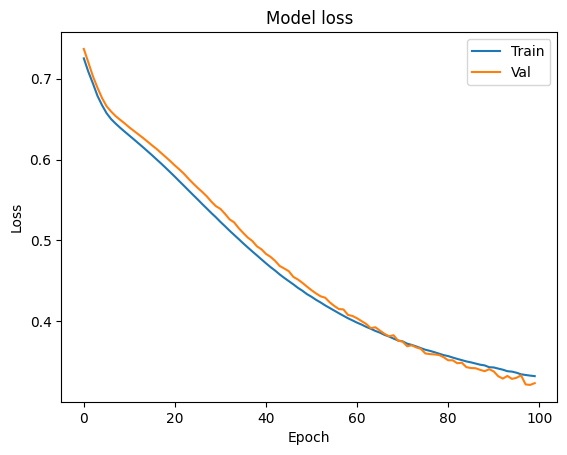

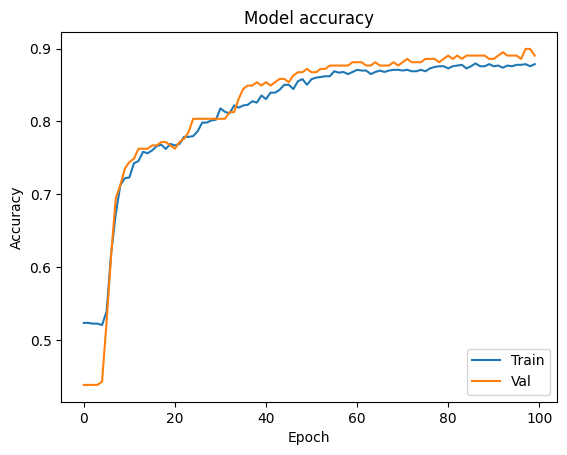

In [8]:
X = dataset [:, 0:10]
Y = dataset [:, 10]

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler ()
X_scale = min_max_scaler.fit_transform (X)

from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split (X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential ( [
    Dense(16, activation='relu', input_shape=(10,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit (X_train, Y_train,
                  batch_size=32, epochs=100,
                  validation_data=(X_val, Y_val))

model.evaluate(X_test, Y_test) [1]

import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()